In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [12]:
aapl_data = pd.read_csv('AAPL.csv', parse_dates = [0], keep_date_col = True)
aapl_data.head(n=5)

,date,close,volume,open,high,low
0,2016-11-04,108.84,30790930.0,108.53,110.25,108.11
1,2016-11-03,109.83,26538700.0,110.98,111.46,109.55
2,2016-11-02,111.59,28174980.0,111.40,112.35,111.23
3,2016-11-01,111.49,43403760.0,113.46,113.77,110.53
4,2016-10-31,113.54,26378910.0,113.65,114.23,113.20


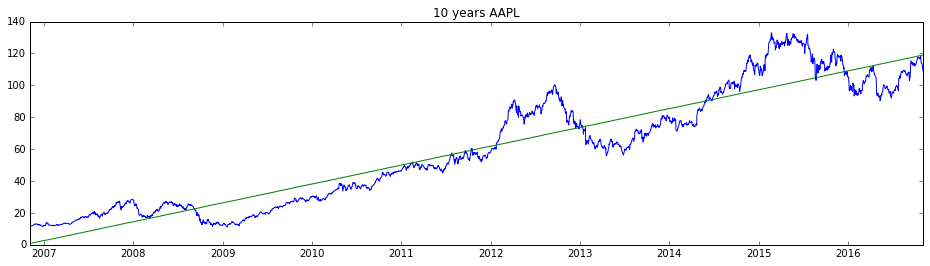

In [36]:
def filter_data_by_date(data, date_start, date_end):
    return data[(data['date'] > date_start) & (data['date'] < date_end)]

def plot_stock_data(data, ax, option="close", title="", lin_reg=False):
    ax.set_title(title)
    ax.plot(data['date'].values, data[option].values)
    
    if(lin_reg):
        lin_reg = linear_model.LinearRegression()
        x_vals = np.arange(len(data['date'].values)).reshape(len(data['date'].values),1)
        lin_reg.fit(x_vals, data[option].values)
        line = lin_reg.predict(x_vals)
        ax.plot(data['date'].values, line)
    return ax

fig, ax = plt.subplots(1, 1, figsize=(16, 4))
plot_stock_data(aapl_data, ax, title="10 years AAPL", lin_reg=True)